# Реализация базовых метрик

Реализовать основные метрики и сравнить их на игрушечном примере.

Оценки которые пользователи поставили фильмам и оценки которые предложили две модели. 

In [4]:
UserRatings = {\
               "User1": [5,3,5,2,1,5,1,5,4,4],\
               "User2": [3,3,3,2,2,3,3,5,4,5],\
               "User3": [1,5,5,1,1,3,3,3,4,5]\
              }

In [5]:
Mode1Ratings = {\
               "User1": [1,3,4,2,2,4,3,4,4,4],\
               "User2": [1,3,4,2,1,3,2,5,5,5],\
               "User3": [1,3,5,1,3,4,4,5,4,3]\
              }

In [6]:
Model2Ratings = {\
               "User1": [5,4,5,4,2,3,2,5,5,5],\
               "User2": [4,4,3,3,1,2,2,3,3,5],\
               "User3": [3,5,5,2,4,2,2,4,4,4]\
              }

*Задача 1:* Вычислите MAE, MSE и RMSE для этих моделей. Какая модель лучше?

*Задача 2:* Реализуйте функцию Recomend(MarkList, N) которая по списку оценок выводит лист из N id фильмов, соответствующих лучшим оценкам. При равенстве оценок лучше считается вильм с меньшим id. id фильма соответствует индекcу в MarkList. 

### Задача 1

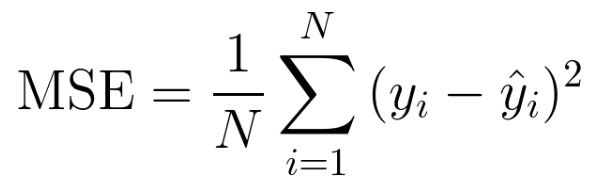

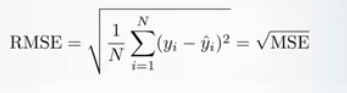

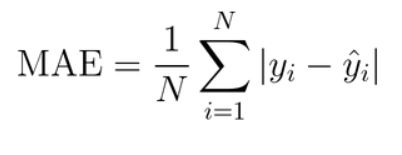

In [69]:
from math import fabs
def regression_metrics(key):
    mse = sum([(UserRatings[key][i] - Mode1Ratings[key][i])**2 for i in range(len(UserRatings[key]))])/len(UserRatings[key])
    rmse = mse**(1/2)
    mae = sum([fabs(UserRatings[key][i] - Mode1Ratings[key][i]) for i in range(len(UserRatings[key]))])/len(UserRatings[key])
    return 'mse: {}; rmse: {}; mae: {}'.format(mse, rmse, mae)

In [70]:
regression_metrics("User1"), regression_metrics("User2"), regression_metrics("User3")

('mse: 2.4; rmse: 1.5491933384829668; mae: 1.0',
 'mse: 0.8; rmse: 0.8944271909999159; mae: 0.6',
 'mse: 1.8; rmse: 1.3416407864998738; mae: 1.0')

### Задача 2

In [7]:
Mode1Ratings

{'User1': [1, 3, 4, 2, 2, 4, 3, 4, 4, 4],
 'User2': [1, 3, 4, 2, 1, 3, 2, 5, 5, 5],
 'User3': [1, 3, 5, 1, 3, 4, 4, 5, 4, 3]}

In [132]:
import pandas as pd

def sort_(list_):
    for i in range(1, len(list_)):
        for j in range(0, i):
            if list_[i] <= list_[j]:
                list_[i], list_[j] = list_[j], list_[i]
    return list_

def Recomend(MarkList, N):    
    index = [i for i in range(1, len(UserRatings["User1"])+1)]
    df = pd.DataFrame({"id":index, "score":MarkList})
    l = list(df.groupby('score')['id'].apply(list))[::-1]
    l = [sort_(i) for i in l]
    int_in_list = 0
    i = 0
    final = []
    while int_in_list <= N:
        final += l[i]
        i += 1
        int_in_list += len(l[i])
        
    return 'films id with best score: {}'.format(', '.join(map(str,final[0:N])))


In [133]:
Recomend(Mode1Ratings["User3"], 6)

'films id with best score: 3, 8, 6, 7, 9, 2'

### Доделать!

*Задача 3:* Для каждого пользователя и для каждой модели постройте рекомендацию 5 лучших фильмов, используя функцию  Recomend(MarkList, N). Считая настоящие(UserRatings) оценки положительными в случае 5 или 4 и отрицательными во всех других случаях, посчитайте precision, recall и roc_auc.

*Задача 4:* Посчитайте NDCG для построенной выше рекомендации с бинарными оценками.

*Задача 5:* Посчитайте NDCG для построенной выше рекомендации, считая что $r_i=2$, при оценке 5, $r_i=1$, при оценке 4, $r_i=0$, в остальных случаях.  

*Задача 6:* Сравните модели по всем метрикам.